# Prévision de la location de vélos à Washington D.C., États-Unis

Abdul Nour Almasri, Charles Elie Azais De Vergeron, Amadou Bocoum et Sofia Cardenas Soto


# Introduction et motivation

Les systèmes de vélos en libre-service constituent aujourd’hui un pilier essentiel de la mobilité urbaine durable. 
Grâce à l’automatisation du processus de location et de retour, ils offrent une alternative écologique et flexible 
aux transports motorisés. Cependant, la demande pour ces vélos varie fortement au cours du temps, selon des facteurs 
comme la météo, la saison, l’heure de la journée ou encore les jours fériés.

L’objectif de ce projet est de **modéliser et prédire la demande horaire de vélos dans la ville de Washington D.C.** 
à partir des données du système **Capital Bikeshare** entre 2011 et 2013.  
Nous chercherons à identifier :
- les variables les plus influentes sur la demande,
- les comportements saisonniers et temporels,
- et les modèles statistiques ou d’apprentissage les plus performants pour la prévision.

**Problématique de recherche :**  
> *Comment modéliser efficacement la demande horaire de vélos à partir de données temporelles et météorologiques, 
et quelle approche offre la meilleure performance prédictive ?*


# Analyse descriptive et exploration 

In [40]:
import numpy as np
import pandas as pd


In [41]:
df = pd.read_csv("hour.csv")
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [42]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
instant,17379.0,8690.000000,5017.029500,1.00,4345.5000,8690.0000,13034.5000,17379.0000
season,17379.0,2.501640,1.106918,1.00,2.0000,3.0000,3.0000,4.0000
yr,17379.0,0.502561,0.500008,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17379.0,6.537775,3.438776,1.00,4.0000,7.0000,10.0000,12.0000
hr,17379.0,11.546752,6.914405,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17379.0,0.028770,0.167165,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17379.0,3.003683,2.005771,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17379.0,0.682721,0.465431,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17379.0,1.425283,0.639357,1.00,1.0000,1.0000,2.0000,4.0000
temp,17379.0,0.496987,0.192556,0.02,0.3400,0.5000,0.6600,1.0000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [44]:
print("Valeurs manquantes:")
print(df.isna().sum())
print("Nombre de doublons:",df.duplicated().sum())

Valeurs manquantes:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Nombre de doublons: 0


In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
quant_vars = ["cnt","casual","registered"]

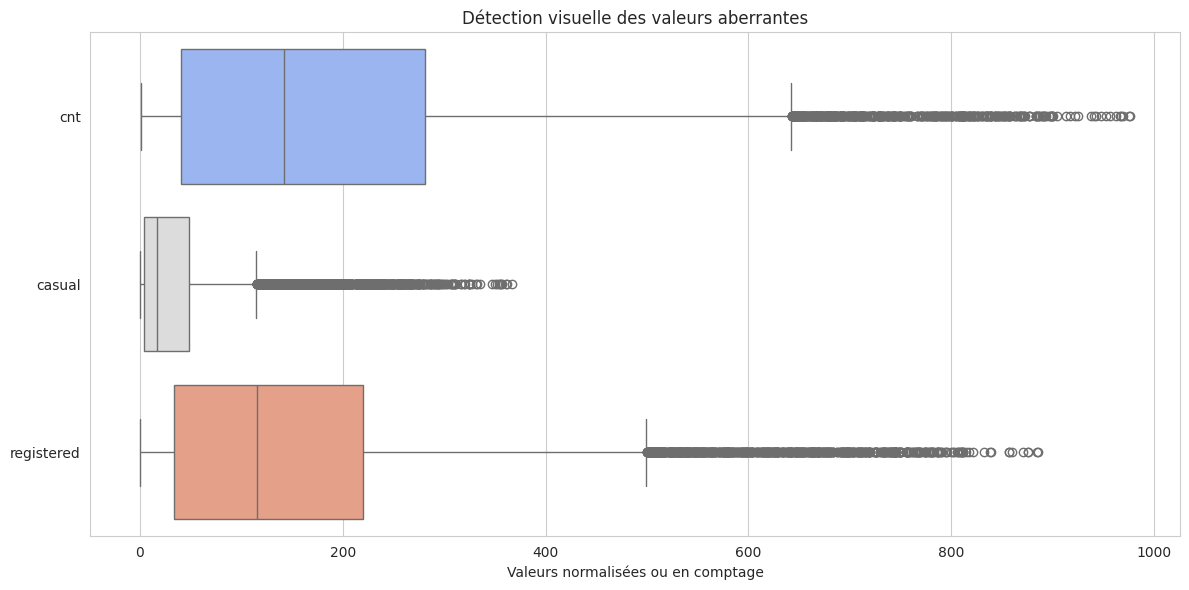

In [47]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[quant_vars], orient="h", palette="coolwarm")
plt.title("Détection visuelle des valeurs aberrantes")
plt.xlabel("Valeurs normalisées ou en comptage")
plt.tight_layout()
plt.show()

In [48]:
quant_vars1 = ["temp","atemp","hum","windspeed"]

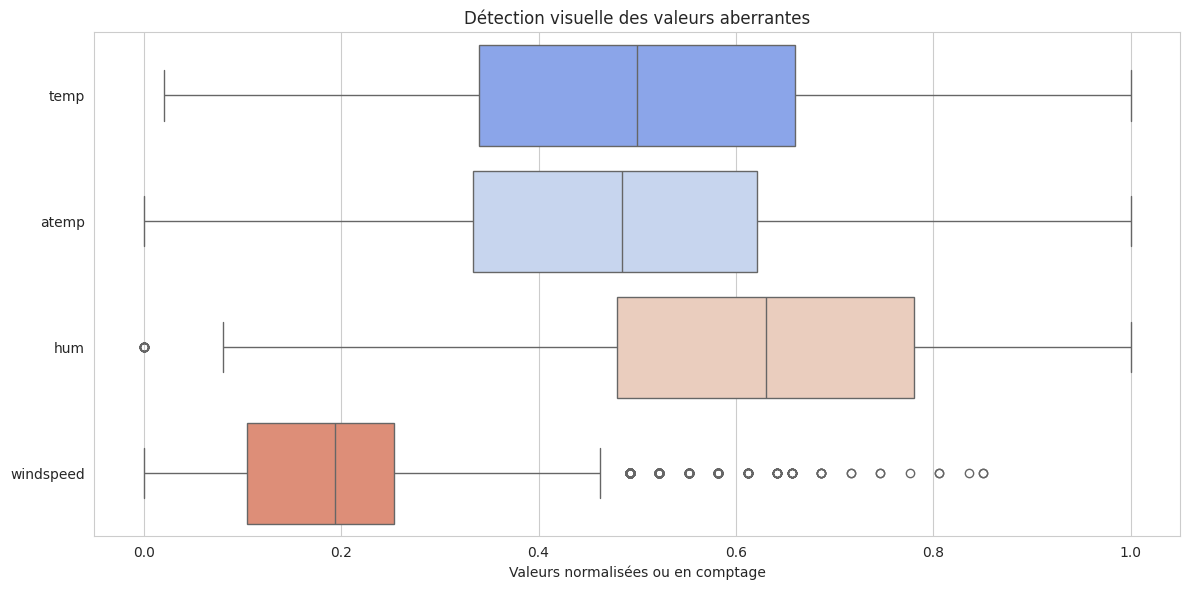

In [49]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[quant_vars1], orient="h", palette="coolwarm")
plt.title("Détection visuelle des valeurs aberrantes")
plt.xlabel("Valeurs normalisées ou en comptage")
plt.tight_layout()
plt.show()

In [50]:
corr_cnt = df.select_dtypes(include=[np.number]).corr()['cnt'].sort_values(ascending=False)
print("Corrélation de chaque variable avec 'cnt' :")
print(corr_cnt.round(2))

Corrélation de chaque variable avec 'cnt' :
cnt           1.00
registered    0.97
casual        0.69
temp          0.40
atemp         0.40
hr            0.39
instant       0.28
yr            0.25
season        0.18
mnth          0.12
windspeed     0.09
workingday    0.03
weekday       0.03
holiday      -0.03
weathersit   -0.14
hum          -0.32
Name: cnt, dtype: float64


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
sns.set_palette("crest")

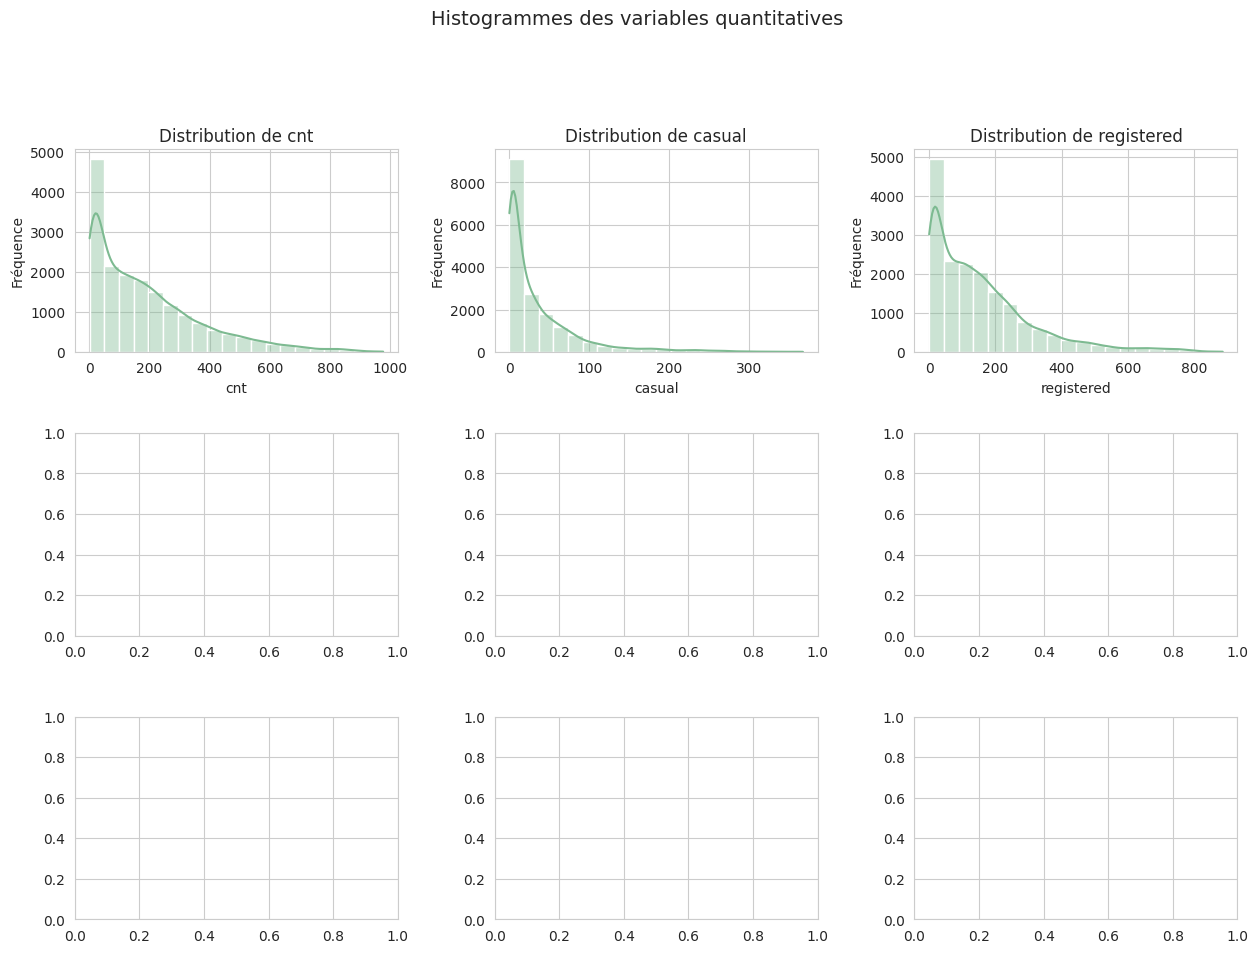

In [52]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.4, wspace=0.3)

for i, col in enumerate(quant_vars):
    ax = axes[i//3, i%3]
    sns.histplot(
        data=df,
        x=col,
        bins=20,
        kde=True,        # ajoute la courbe de densité
        alpha=0.4,       # transparence des barres
        ax=ax
    )
    ax.set_title(f'Distribution de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Fréquence')

plt.suptitle("Histogrammes des variables quantitatives", fontsize=14, y=1.02)
plt.show()

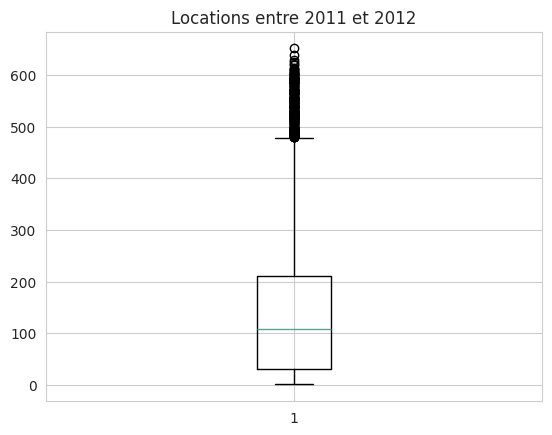

In [53]:
plt.boxplot(df.cnt[:8750])
plt.title("Locations entre 2011 et 2012");

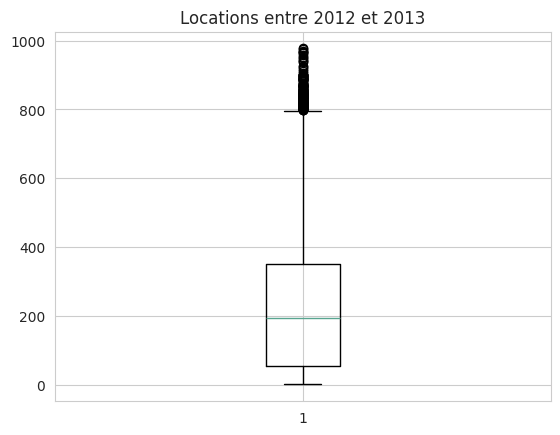

In [54]:
plt.boxplot(df.cnt[8750:])
plt.title("Locations entre 2012 et 2013");

Text(0.5, 1.0, 'Location de vélos entre 2011 et 2013')

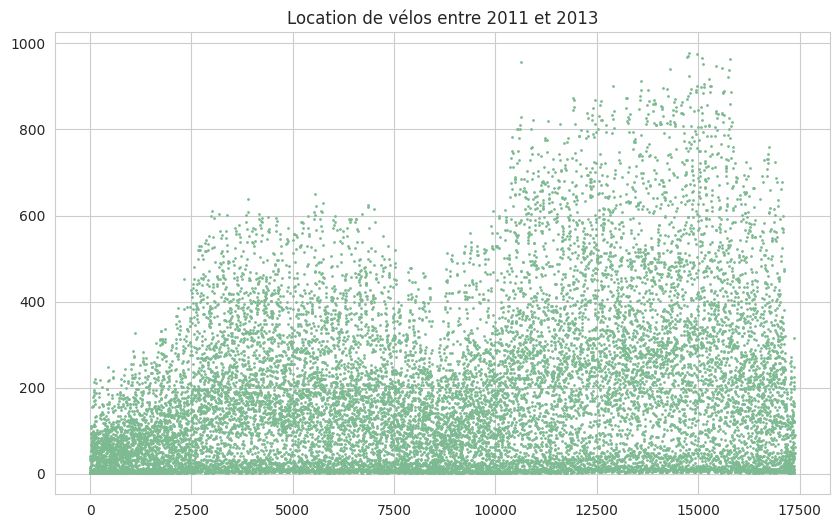

In [55]:
plt.figure(figsize=(10, 6))

plt.plot(df.instant,df.cnt,".",ms = 2)
plt.title("Location de vélos entre 2011 et 2013")

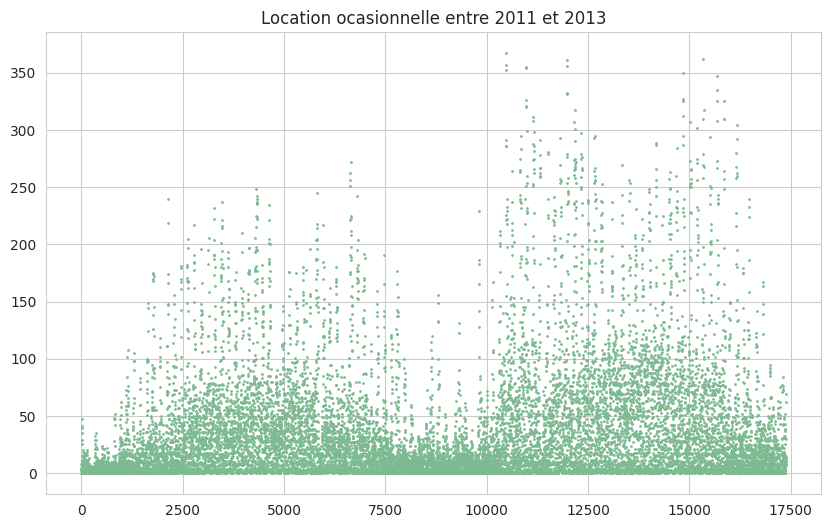

In [56]:
plt.figure(figsize=(10, 6))

plt.plot(df.instant,df.casual,".",ms = 2)
plt.title("Location ocasionnelle entre 2011 et 2013");

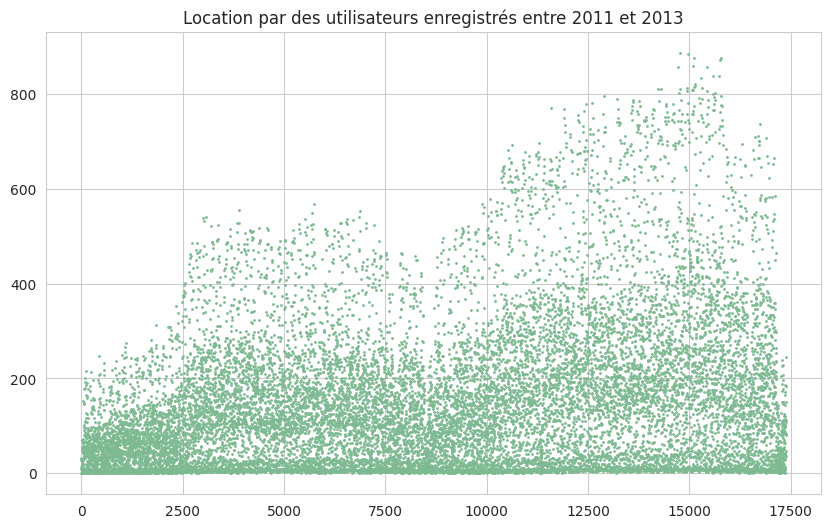

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(df.instant,df.registered,".",ms = 2, label = "registered")
plt.title("Location par des utilisateurs enregistrés entre 2011 et 2013");

''

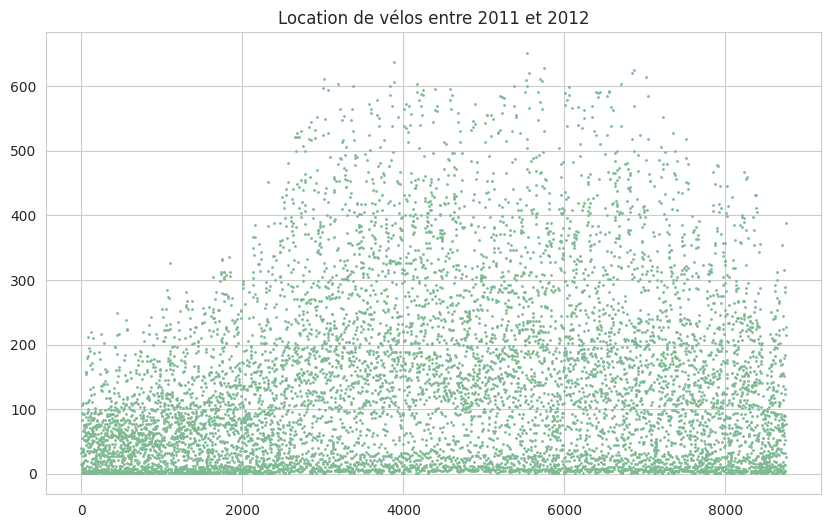

In [58]:
plt.figure(figsize=(10, 6))

plt.plot(df.instant[:8750],df.cnt[:8750],".",ms = 2)

plt.title("Location de vélos entre 2011 et 2012")
;

In [59]:
df_feries = df[df['holiday'] == 1]
df_non_feries = df[df['holiday'] == 0]

In [60]:
evol_jour = df.groupby(['hr'])['cnt'].mean()
evol_jour_feries = df_feries.groupby(['hr'])['cnt'].mean()
evol_jour_non_feries = df_non_feries.groupby('hr')['cnt'].mean()

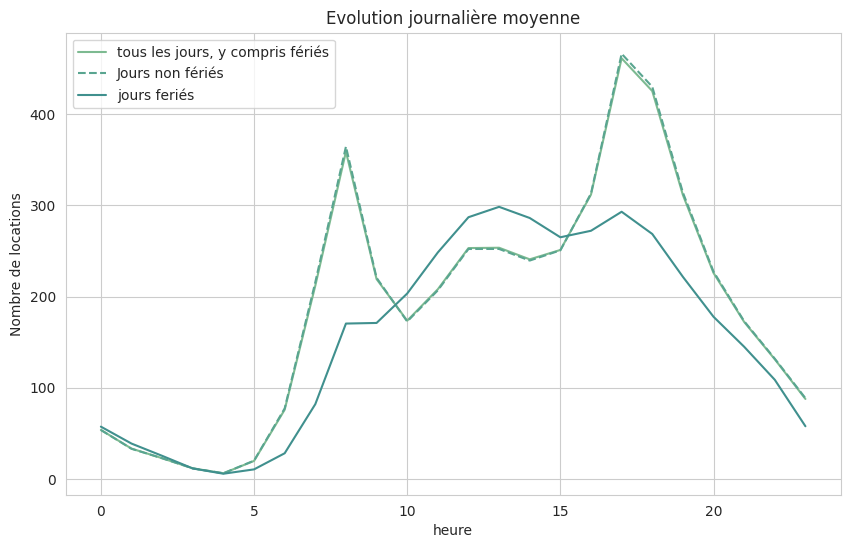

In [61]:
plt.figure(figsize=(10, 6))
plt.plot(evol_jour, label = "tous les jours, y compris fériés")
plt.plot(evol_jour_non_feries, label="Jours non fériés", linestyle='--')
plt.plot(evol_jour_feries, label = "jours feriés")
plt.title("Evolution journalière moyenne")
plt.xlabel("heure")
plt.ylabel("Nombre de locations")
plt.legend();

In [62]:
jours = ['Dimanche','Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi']

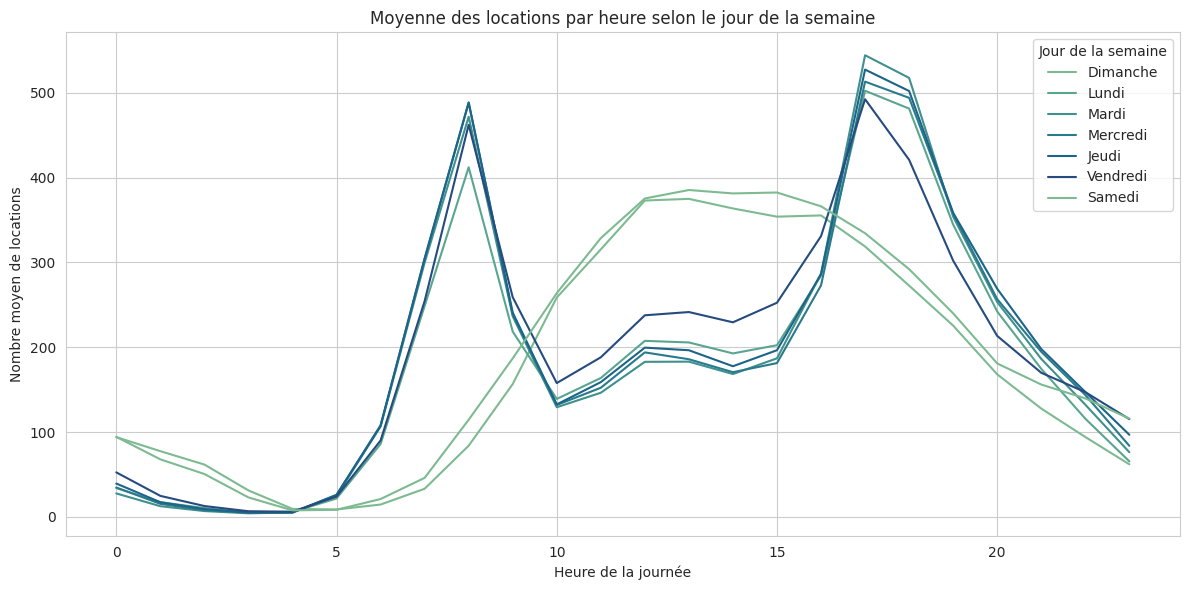

In [63]:
grouped = df.groupby(['hr', 'weekday'])['cnt'].mean().reset_index()

plt.figure(figsize=(12, 6))
for i in range(7):
    data_jour = grouped[grouped['weekday'] == i]
    plt.plot(data_jour['hr'], data_jour['cnt'], label=jours[i])

plt.title("Moyenne des locations par heure selon le jour de la semaine")
plt.xlabel("Heure de la journée")
plt.ylabel("Nombre moyen de locations")
plt.legend(title="Jour de la semaine")
plt.grid(True)
plt.tight_layout();

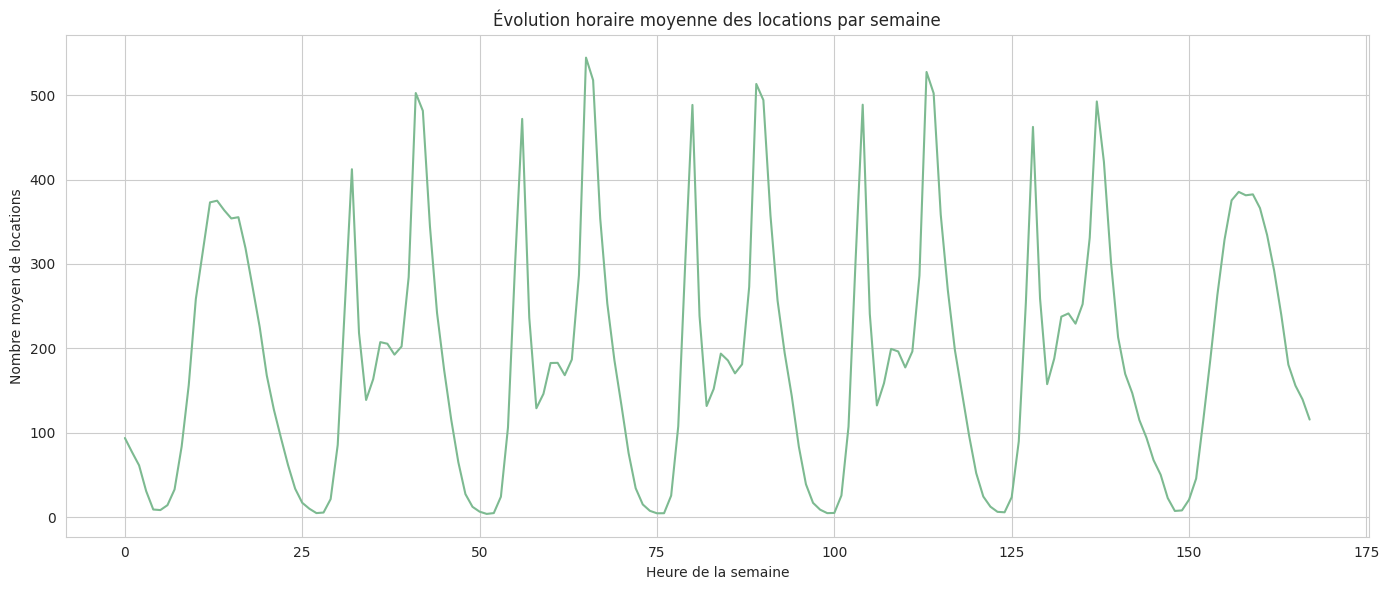

In [64]:
df['heure_semaine'] = df['weekday'] * 24 + df['hr']
grouped = df.groupby('heure_semaine')['cnt'].mean().reset_index()

plt.figure(figsize=(14, 6))
plt.plot(grouped['heure_semaine'], grouped['cnt'])
plt.title("Évolution horaire moyenne des locations par semaine")
plt.xlabel("Heure de la semaine")
plt.ylabel("Nombre moyen de locations")
plt.grid(True)
plt.tight_layout()
plt.show()

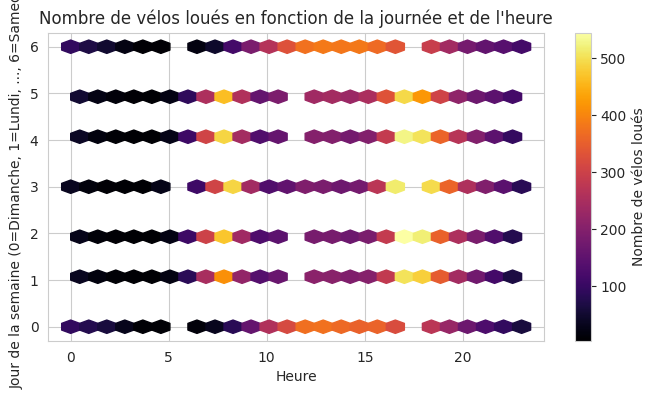

In [65]:
daily_rentals = df.groupby('weekday')['cnt'].sum().reset_index()
plt.figure(figsize=(8, 4))
plt.hexbin(df['hr'], df['weekday'], C=df['cnt'], gridsize=25, cmap='inferno')
plt.title('Nombre de vélos loués en fonction de la journée et de l\'heure')
plt.xlabel('Heure')
plt.ylabel('Jour de la semaine (0=Dimanche, 1=Lundi, ..., 6=Samedi)')
plt.colorbar(label='Nombre de vélos loués')
plt.show()

### Bilan de l’exploration
L’analyse exploratoire montre que :
- Le service connaît une **tendance générale à la hausse** entre 2011 et 2013 ;
- Les locations sont **fortement dépendantes de l’heure** (pics matin/soir) et du **jour de la semaine** ;
- Les conditions météorologiques et les jours fériés influencent nettement la demande.
Ces premières observations suggèrent une **structure saisonnière et temporelle marquée**, justifiant
une modélisation de type “série temporelle”.

## Analyse temporelle 

In [66]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller, kpss

In [67]:
df_2011 = df[df['yr'] == 0].sort_values(['dteday', 'hr'])
serie_2011 = df_2011['cnt']
print("Nombre d’observations (2011):", len(serie_2011))

Nombre d’observations (2011): 8645


In [68]:
adf_pvalue = adfuller(serie_2011.values, autolag='AIC')[1]
print(f"ADF p-value : {adf_pvalue:}")
if adf_pvalue < 0.05:
    print("Le test ADF indique : stationnaire (p < 0.05)")
else:
    print("Le test ADF indique : non-stationnaire (p ≥ 0.05)")

ADF p-value : 2.992718730823216e-08
Le test ADF indique : stationnaire (p < 0.05)


In [69]:
kpss_pvalue = kpss(serie_2011.values, regression='c', nlags='auto')[1]
print(f"KPSS p-value : {kpss_pvalue:}")
if kpss_pvalue < 0.05:
    print("Le test KPSS indique : non-stationnaire (p < 0.05)")
else:
    print("Le test KPSS indique : stationnaire (p ≥ 0.05)")

KPSS p-value : 0.01
Le test KPSS indique : non-stationnaire (p < 0.05)


/tmp/ipykernel_89079/2664697718.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_pvalue = kpss(serie_2011.values, regression='c', nlags='auto')[1]


<Figure size 1200x800 with 0 Axes>

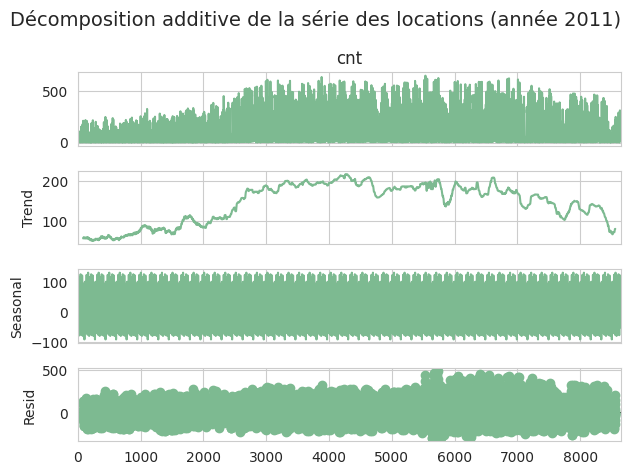

In [70]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(serie_2011, model='additive', period=24*7)  # période = une semaine
plt.figure(figsize=(12, 8))
result.plot()
plt.suptitle("Décomposition additive de la série des locations (année 2011)", fontsize=14)
plt.tight_layout()
plt.show()

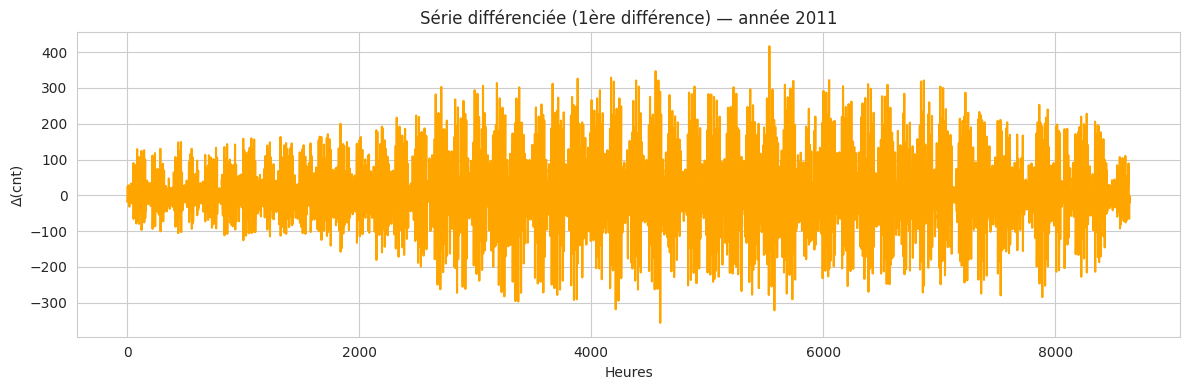

In [72]:
# On calcule la 1ère différence : Δ(cnt) = cnt(t) - cnt(t-1)
serie_diff = serie_2011.diff().dropna()
plt.figure(figsize=(12,4))
plt.plot(serie_diff, color='orange')
plt.title("Série différenciée (1ère différence) — année 2011")
plt.xlabel("Heures")
plt.ylabel("Δ(cnt)")
plt.tight_layout()
plt.show()

In [73]:
stat, p_value, _, _ = kpss(serie_diff.values, regression='c', nlags='auto')
print(f"p-value du test KPSS (série différenciée) : {p_value:.4f}")

if p_value < 0.05:
    print("=> Série encore non stationnaire (p < 0.05)")
else:
    print("Série probablement stationnaire après différenciation (p ≥ 0.05)")

p-value du test KPSS (série différenciée) : 0.1000
Série probablement stationnaire après différenciation (p ≥ 0.05)


/tmp/ipykernel_89079/1370288630.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, p_value, _, _ = kpss(serie_diff.values, regression='c', nlags='auto')


<Figure size 1200x400 with 0 Axes>

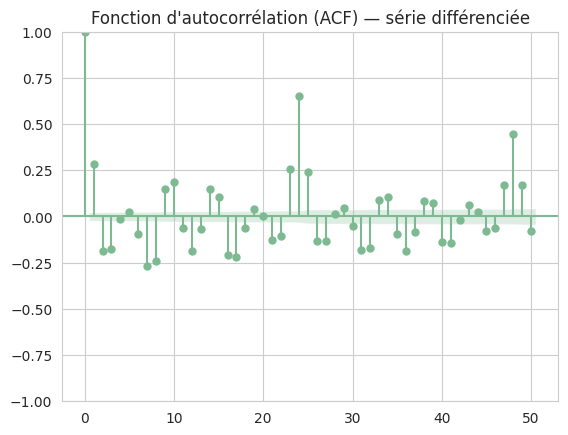

<Figure size 1200x400 with 0 Axes>

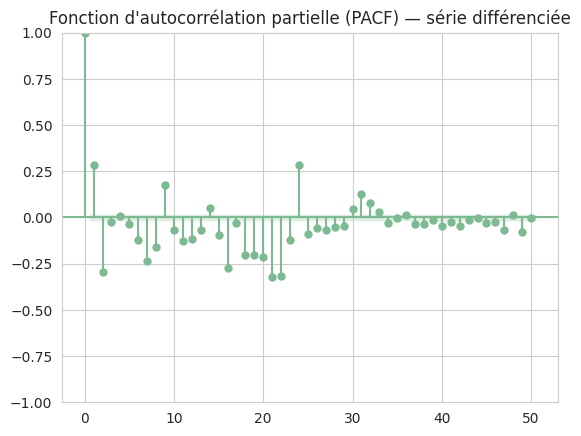

In [74]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.figure(figsize=(12,4))
plot_acf(serie_diff, lags=50)
plt.title("Fonction d'autocorrélation (ACF) — série différenciée")
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(serie_diff, lags=50)
plt.title("Fonction d'autocorrélation partielle (PACF) — série différenciée")
plt.show()

<Figure size 1200x800 with 0 Axes>

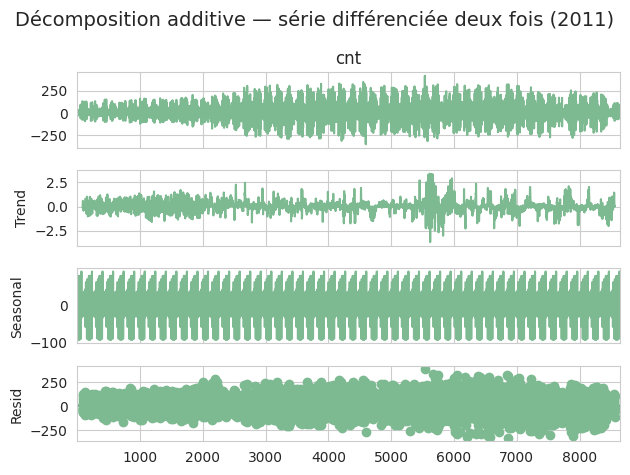

In [75]:
result = seasonal_decompose(serie_diff, model='additive', period=24*7)  # 1 semaine = 24*7 heures
plt.figure(figsize=(12, 8))
result.plot()
plt.suptitle("Décomposition additive — série différenciée deux fois (2011)", fontsize=14)
plt.tight_layout()
plt.show()

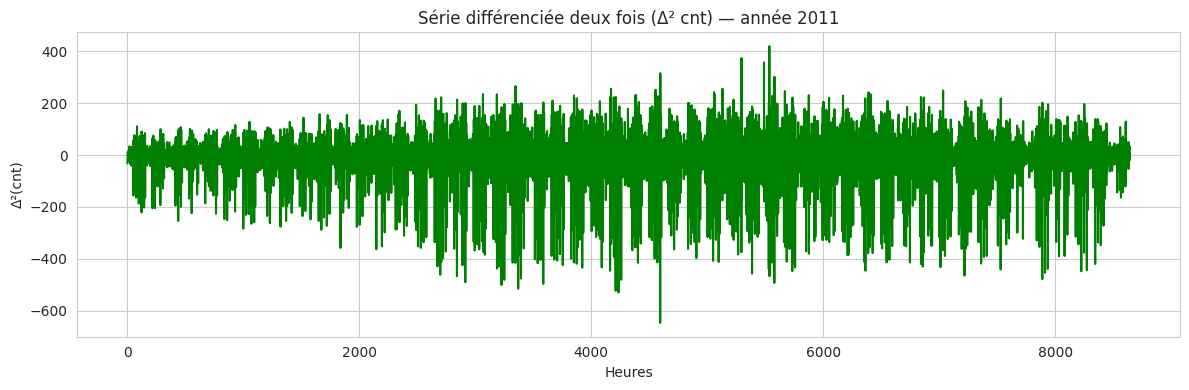

In [76]:
# Deuxième différenciation
serie_diff2 = serie_diff.diff().dropna()
plt.figure(figsize=(12,4))
plt.plot(serie_diff2, color='green')
plt.title("Série différenciée deux fois (Δ² cnt) — année 2011")
plt.xlabel("Heures")
plt.ylabel("Δ²(cnt)")
plt.tight_layout()
plt.show()

In [77]:
stat, p_value, _, _ = kpss(serie_diff2.values, regression='c', nlags='auto')
print(f"p-value du test KPSS (2ᵉ différenciation) : {p_value:}")

if p_value < 0.05:
    print("Série encore non stationnaire (p < 0.05)")
else:
    print("Série probablement stationnaire après 2ᵉ différenciation (p ≥ 0.05)")

p-value du test KPSS (2ᵉ différenciation) : 0.1
Série probablement stationnaire après 2ᵉ différenciation (p ≥ 0.05)


/tmp/ipykernel_89079/585503930.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  stat, p_value, _, _ = kpss(serie_diff2.values, regression='c', nlags='auto')


<Figure size 1200x400 with 0 Axes>

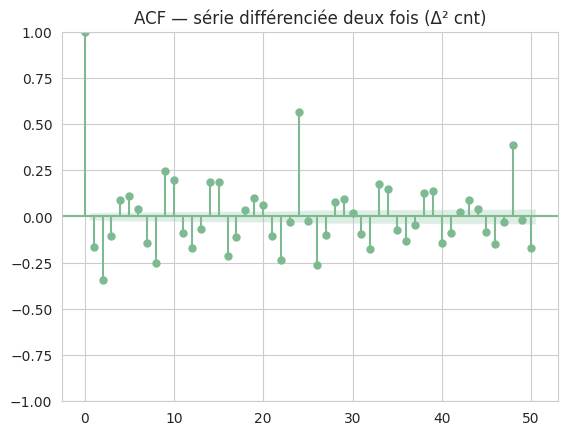

<Figure size 1200x400 with 0 Axes>

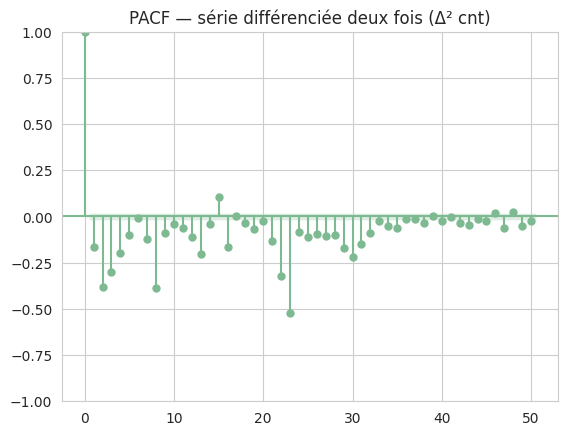

In [78]:
plt.figure(figsize=(12,4))
plot_acf(serie_diff2, lags=50)
plt.title("ACF — série différenciée deux fois (Δ² cnt)")
plt.show()

plt.figure(figsize=(12,4))
plot_pacf(serie_diff2, lags=50)
plt.title("PACF — série différenciée deux fois (Δ² cnt)")
plt.show()


<Figure size 1200x800 with 0 Axes>

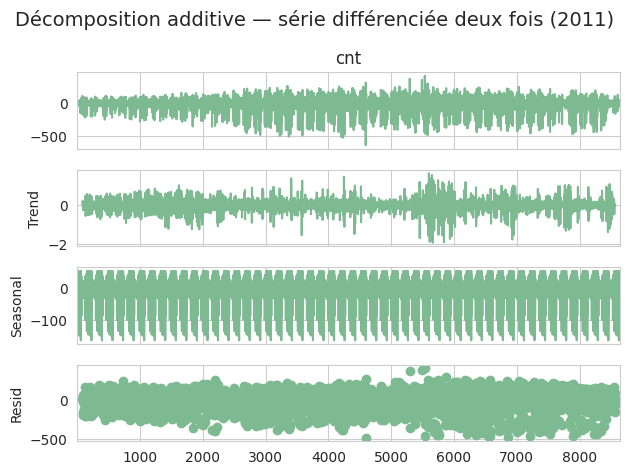

In [79]:
result = seasonal_decompose(serie_diff2, model='additive', period=24*7)  # 1 semaine = 24*7 heures
plt.figure(figsize=(12, 8))
result.plot()
plt.suptitle("Décomposition additive — série différenciée deux fois (2011)", fontsize=14)
plt.tight_layout()
plt.show()

### Ingénierie temporelle des variables

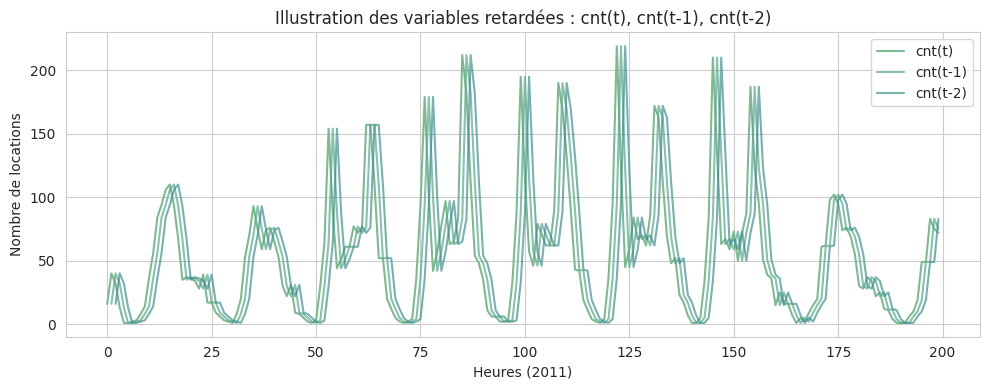

In [80]:
# Variables retardées temporaires
lag_1 = serie_2011.shift(1)
lag_2 = serie_2011.shift(2)

plt.figure(figsize=(10,4))
plt.plot(serie_2011[:200], label="cnt(t)")
plt.plot(lag_1[:200], label="cnt(t-1)", alpha=0.7)
plt.plot(lag_2[:200], label="cnt(t-2)", alpha=0.7)
plt.title("Illustration des variables retardées : cnt(t), cnt(t-1), cnt(t-2)")
plt.xlabel("Heures (2011)")
plt.ylabel("Nombre de locations")
plt.legend()
plt.tight_layout()
plt.show()

In [81]:
# On visualise clairement la dépendance temporelle : les valeurs de cnt(t) suivent de près celles de cnt(t−1) et cnt(t−2).

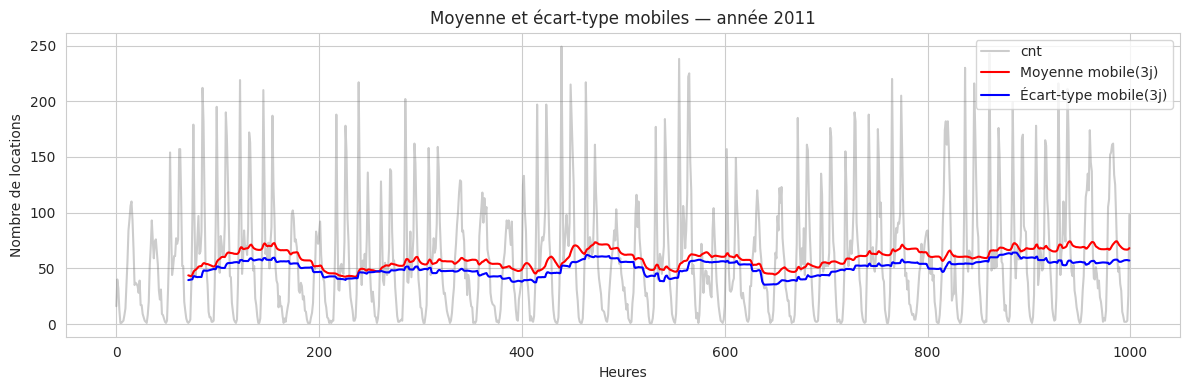

In [82]:
rolling_mean = serie_2011.rolling(window=24*3).mean()   # moyenne sur 3 jours
rolling_std  = serie_2011.rolling(window=24*3).std()

plt.figure(figsize=(12,4))
plt.plot(serie_2011[:1000], color='gray', alpha=0.4, label='cnt')
plt.plot(rolling_mean[:1000], color='red', label='Moyenne mobile(3j)')
plt.plot(rolling_std[:1000], color='blue', label='Écart-type mobile(3j)')
plt.title("Moyenne et écart-type mobiles — année 2011")
plt.xlabel("Heures")
plt.ylabel("Nombre de locations")
plt.legend()
plt.tight_layout()
plt.show()

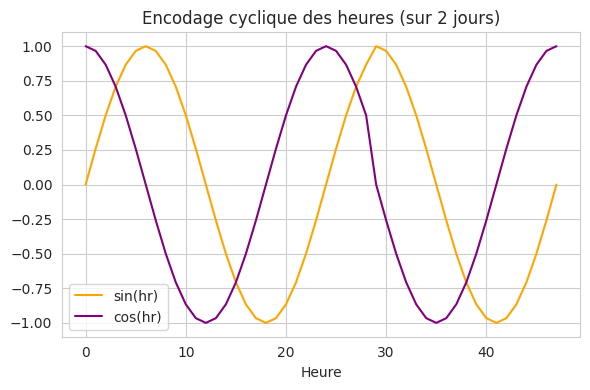

In [83]:
import numpy as np
heures = df_2011['hr']
heures_sin = np.sin(2 * np.pi * heures / 24)
heures_cos = np.cos(2 * np.pi * heures / 24)

plt.figure(figsize=(6,4))
plt.plot(heures_sin[:48], label="sin(hr)", color='orange')
plt.plot(heures_cos[:48], label="cos(hr)", color='purple')
plt.title("Encodage cyclique des heures (sur 2 jours)")
plt.xlabel("Heure")
plt.legend()
plt.tight_layout()
plt.show()

In [84]:
df_norm = df_2011[quant_vars].copy()
df_norm = (df_norm - df_norm.min()) / (df_norm.max() - df_norm.min())
df_norm.describe()

,cnt,casual,registered
count,8645.000000,8645.000000,8645.000000
mean,0.219684,0.105149,0.203164
std,0.205843,0.142797,0.193053
min,0.000000,0.000000,0.000000
25%,0.046154,0.011029,0.045855
50%,0.166154,0.051471,0.158730
75%,0.323077,0.139706,0.296296
max,1.000000,1.000000,1.000000


Modélisation
Nour
1. Modèles statistiques classiques

Régression linéaire multiple (OLS)

Modèles temporels : AR, ARIMA, SARIMA

Lissage exponentiel et moyennes mobiles pondérées
Charles
2. Modèles de Machine Learning

Régression polynomiale, Ridge, Lasso

k-Nearest Neighbors (KNN Regressor)

Arbres de décision / Random Forest

Gradient Boosting 
AMADOU Sofia et mémoire  
3. Modèles Deep Learning

Réseaux de neurones fully connected (MLP)

RNN / LSTM / GRU

Temporal Convolutional Networks (TCN)

# Bibliographie

Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15